# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.src.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Data Preparation

In [3]:
# Beispiel Daten laden
data = pd.read_csv('./../Data/preprocessed_df_v2.csv') # Pfad zu Ihren Daten

# Daten skalieren
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Dimension der Eingabedaten
input_dim = data_scaled.shape[1]

print(data_scaled[:5])

[[0.         0.         0.0030929  0.05263158 0.         0.10526316
  0.26315789 0.21052632 0.05263158 0.135      0.7440808  0.74566782
  0.06277255 0.53601451 0.15244447 0.0270285  0.48987881 0.32269304
  0.14196099 0.16092518 0.19536516 0.1978343 ]
 [0.         0.33333333 0.00238009 0.47368421 0.26315789 0.21052632
  0.52631579 0.10526316 0.21052632 0.35375    0.70649122 0.71014102
  0.         0.31792393 0.0970566  0.         0.26586926 0.1913975
  0.05428654 0.09220001 0.12609022 0.13874713]
 [0.         0.66666667 0.00831226 1.         0.05263158 0.73684211
  0.84210526 0.89473684 0.15789474 0.72875    0.77876653 0.78222397
  0.20698158 0.35502628 0.27968847 0.08912179 0.30397857 0.21373397
  0.22286247 0.22434125 0.26664727 0.25863346]
 [0.         1.         0.00371728 0.57894737 0.10526316 0.42105263
  0.52631579 0.15789474 0.21052632 0.395      0.82198233 0.8251407
  0.05533873 0.52209791 0.14588518 0.02382766 0.47558452 0.31431493
  0.32365963 0.30335288 0.35033209 0.33001136

In [4]:

# Berechnen Sie den Mittelwert und die Standardabweichung für jede Eigenschaft der skalierten Daten
means = np.mean(data_scaled, axis=0)
stds = np.std(data_scaled, axis=0)

# Anzahl der zu generierenden Datenpunkte
num_additional_points = 1000

# Generieren Sie zusätzliche skalierten Datenpunkte basierend auf den Mittelwerten und Standardabweichungen
synthetic_data_scaled = np.random.normal(loc=means, scale=stds, size=(num_additional_points, data_scaled.shape[1]))

# Die generierten Daten zurückskalieren auf den ursprünglichen Wertebereich
synthetic_data = scaler.inverse_transform(synthetic_data_scaled)

# Die generierten Daten mit den Originaldaten kombinieren
augmented_data = np.vstack((data, synthetic_data))

# Optional: Konvertieren Sie die Daten in ein TensorFlow-Dataset
dataset = tf.data.Dataset.from_tensor_slices(augmented_data)

print("Original Data Shape:", data.shape)
print("Synthetic Data Shape:", synthetic_data.shape)
print("Augmented Data Shape:", augmented_data.shape)

Original Data Shape: (188, 22)
Synthetic Data Shape: (1000, 22)
Augmented Data Shape: (1188, 22)


2024-06-20 12:53:51.830602: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-06-20 12:53:51.830626: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-06-20 12:53:51.830632: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-06-20 12:53:51.830816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-20 12:53:51.830832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:

augmented_data = pd.DataFrame(augmented_data, columns=data.columns)

print(augmented_data[:5])

   participant_id  test_id  test_duration  mental  physical  temporal  \
0             1.0      1.0      33.643950    10.0       5.0      15.0   
1             1.0      2.0      28.484322    50.0      30.0      25.0   
2             1.0      3.0      71.423823   100.0      10.0      75.0   
3             1.0      4.0      38.163442    60.0      15.0      45.0   
4             2.0      1.0      41.748047    20.0      10.0      20.0   

   performance  effort  frustration  mean  ...  blinkrate  fixationrate  \
0         25.0    25.0         10.0  15.0  ...   0.059446      0.295946   
1         50.0    15.0         25.0  32.5  ...   0.000000      0.175533   
2         80.0    90.0         20.0  62.5  ...   0.196013      0.196018   
3         50.0    20.0         25.0  35.8  ...   0.052406      0.288263   
4         10.0    20.0         15.0  15.8  ...   0.047906      0.143727   

   blinkrate_rel  blinkrate_rel_pct  fixationrate_rel  fixationrate_rel_pct  \
0       0.000000           0.00

Synthetic Data saved successfully!


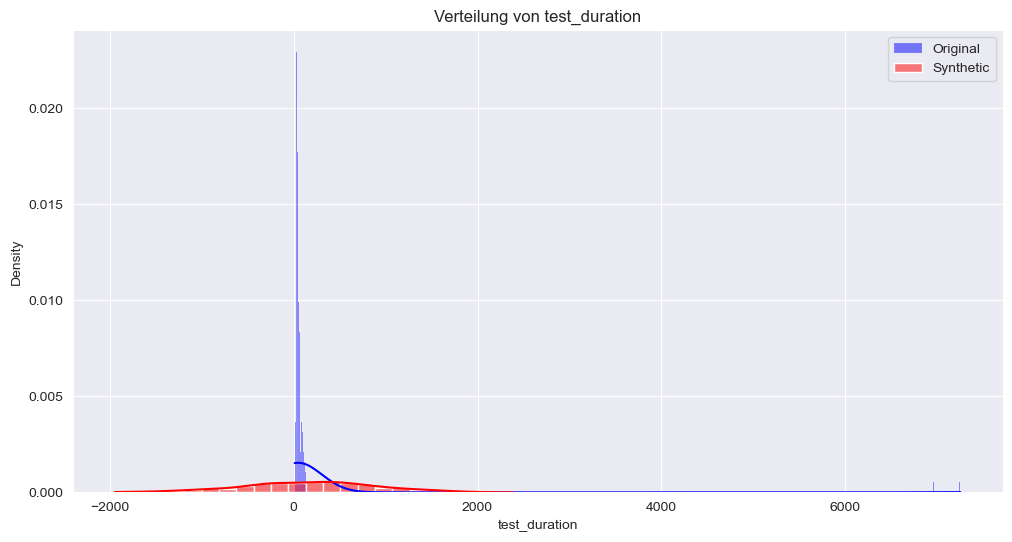

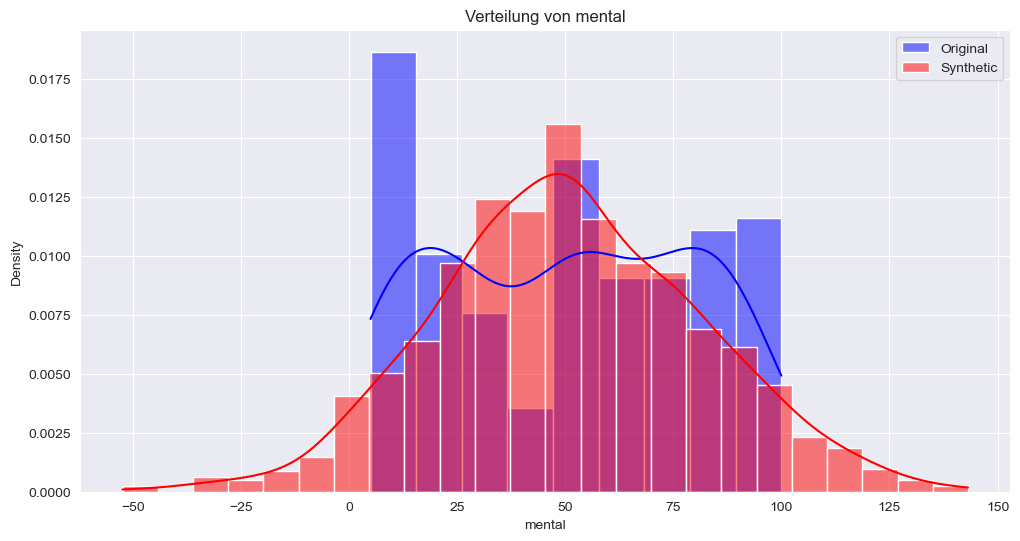

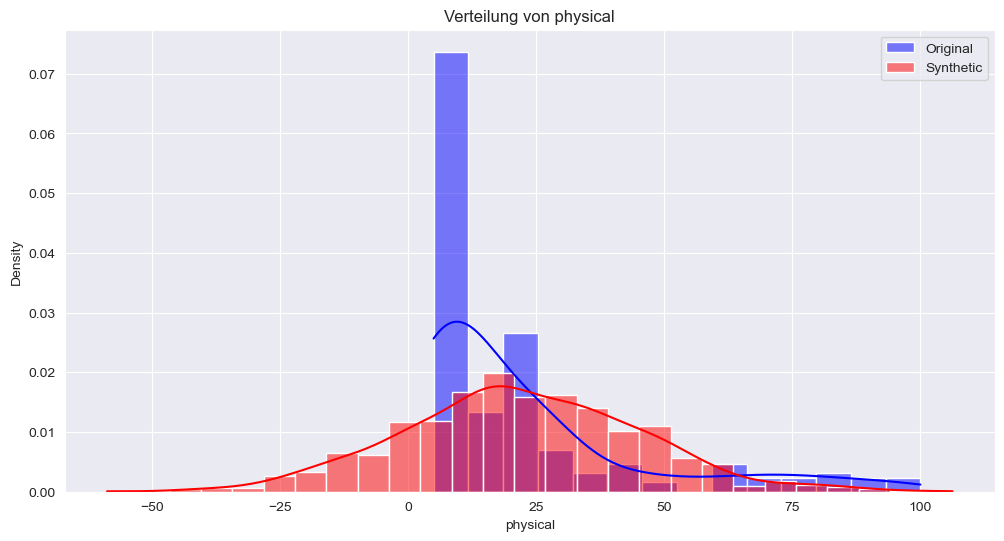

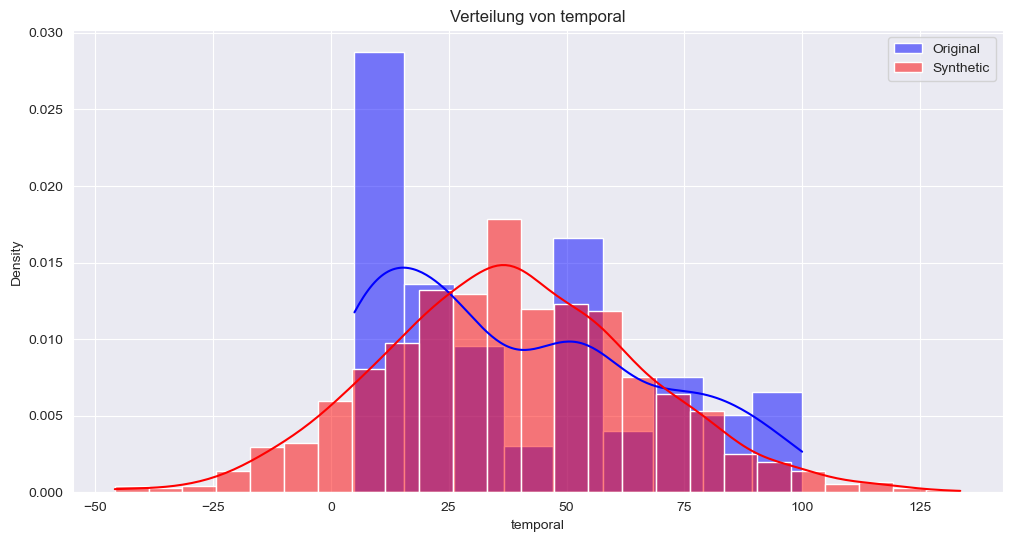

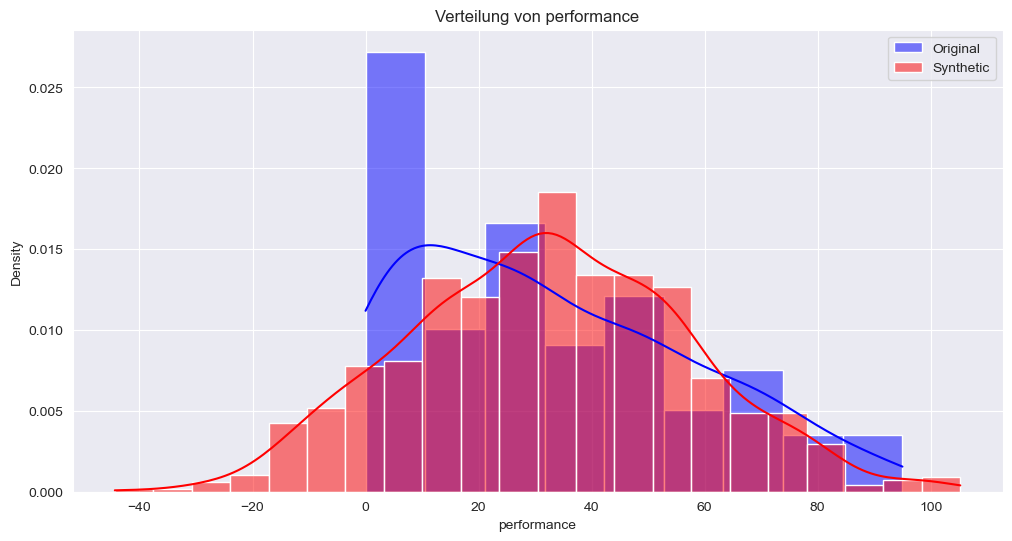

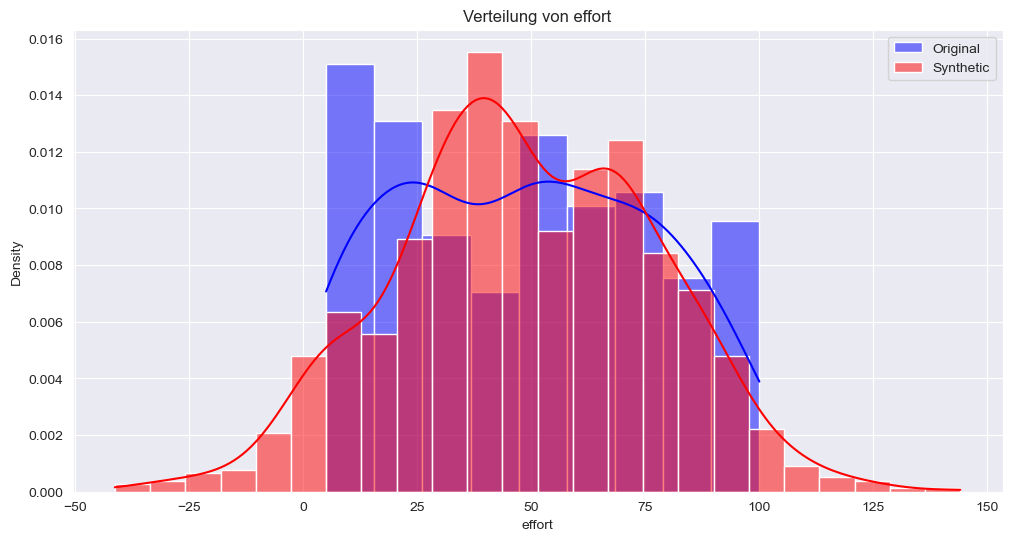

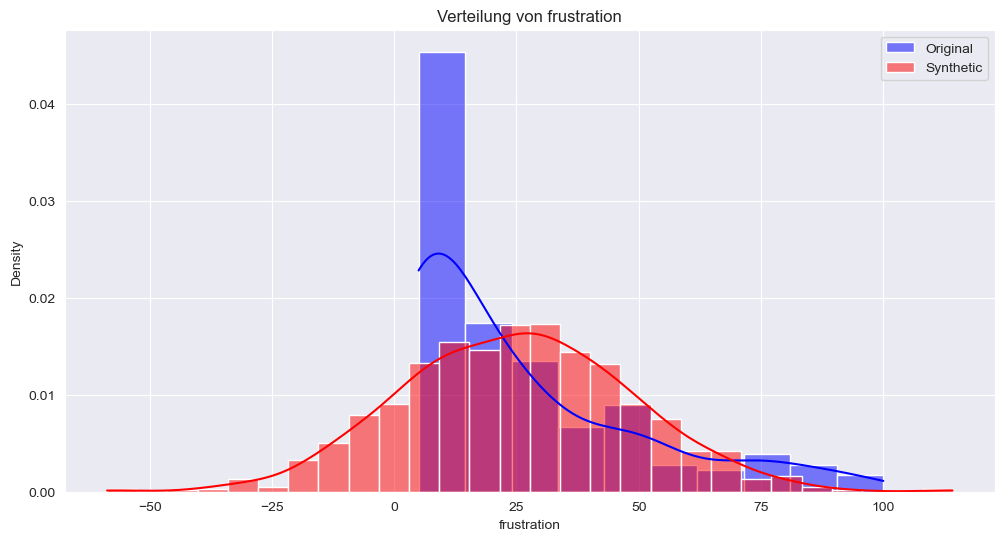

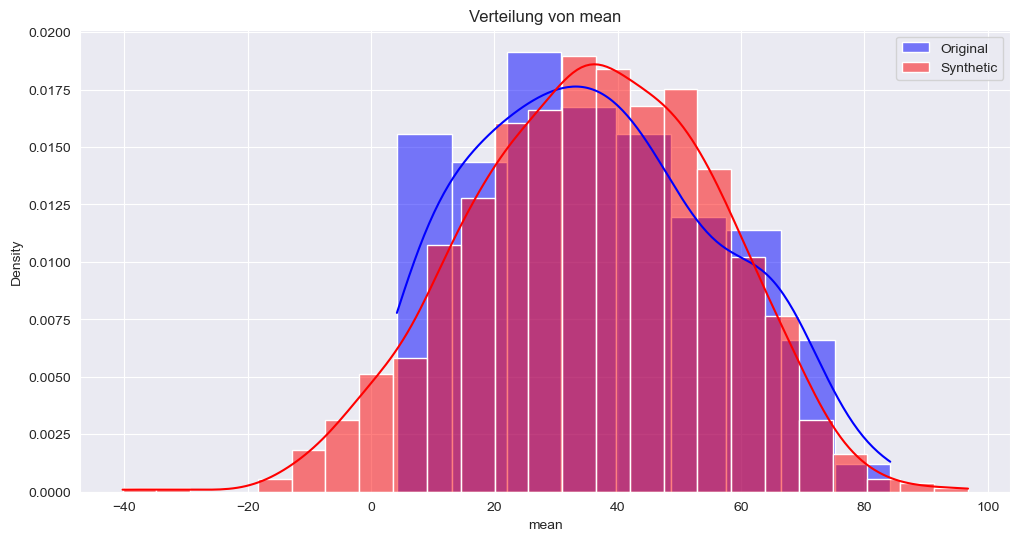

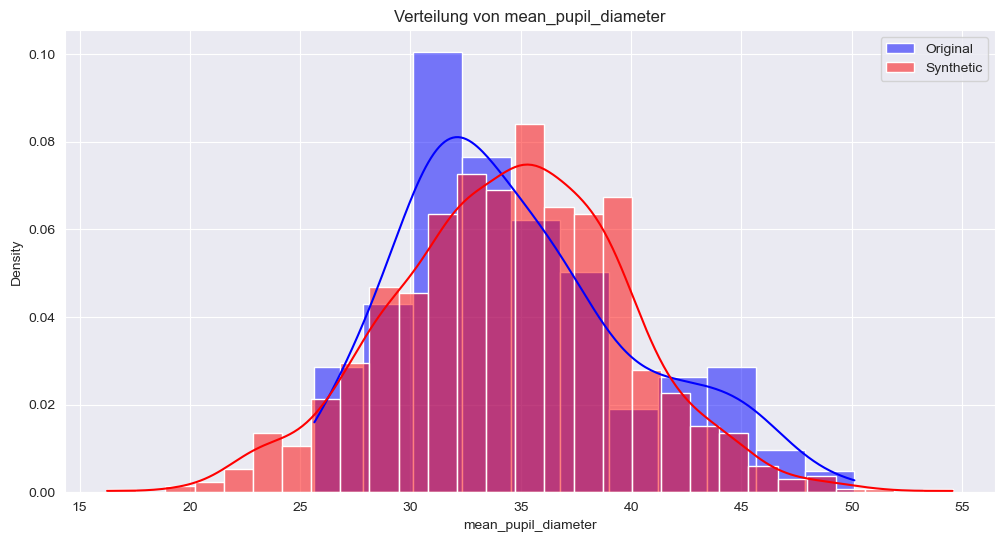

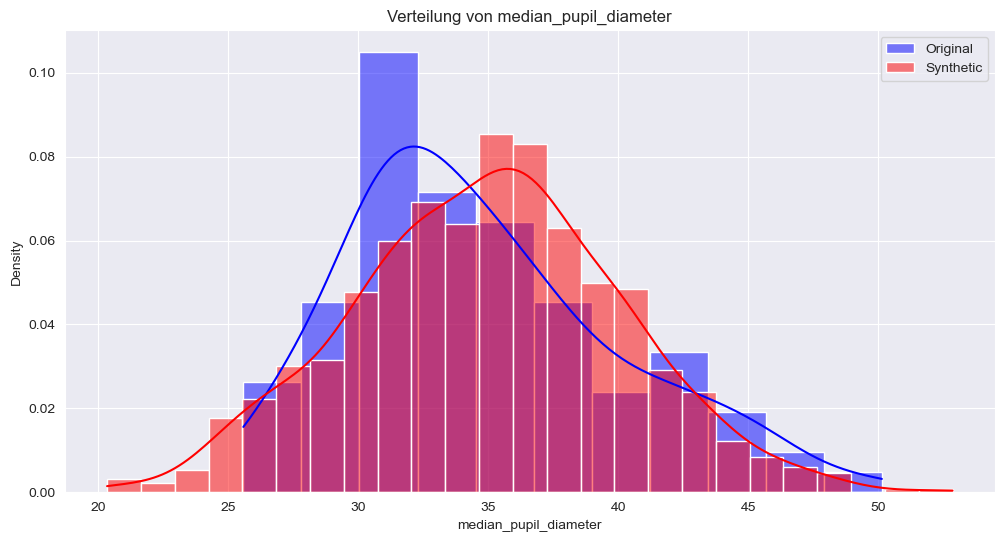

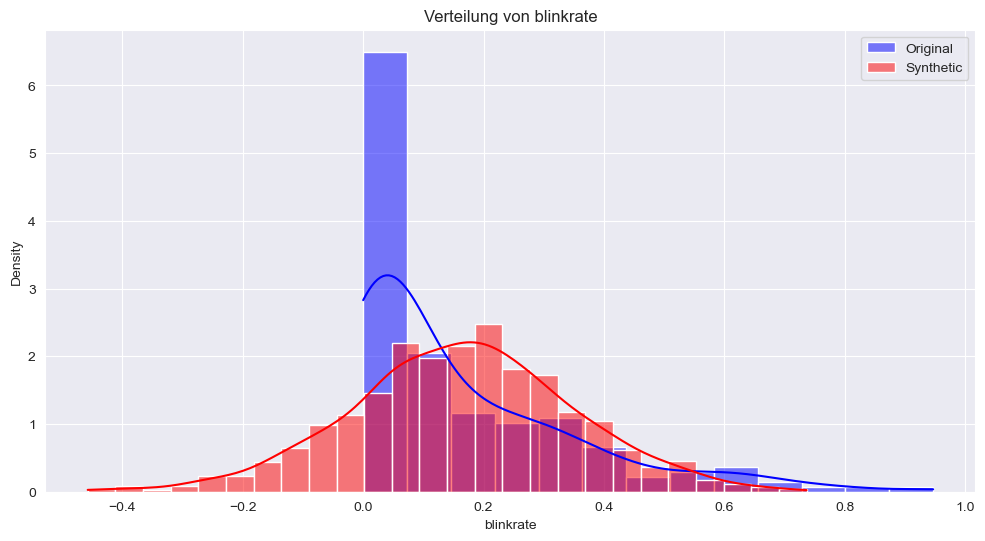

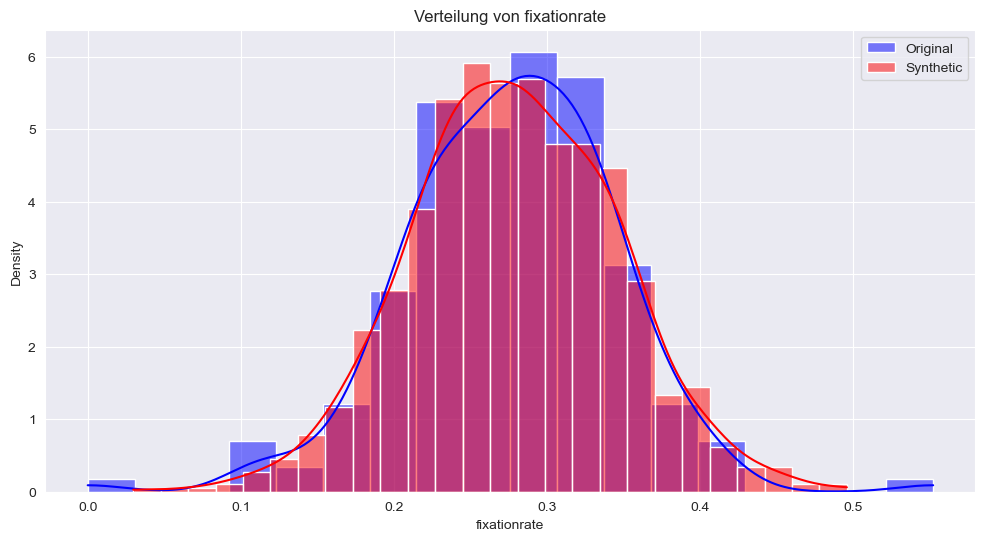

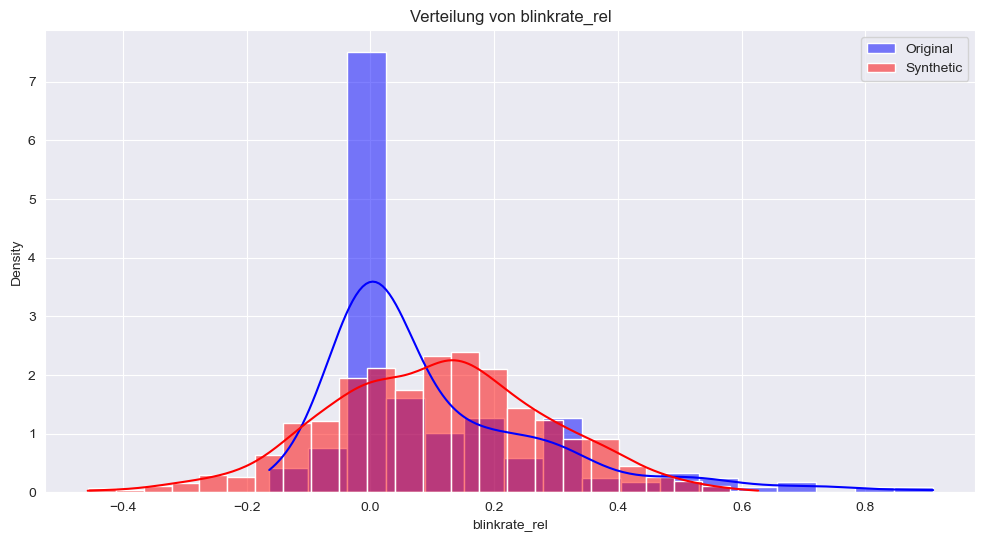

/Users/hennerbendig/anaconda3/envs/tf_311/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


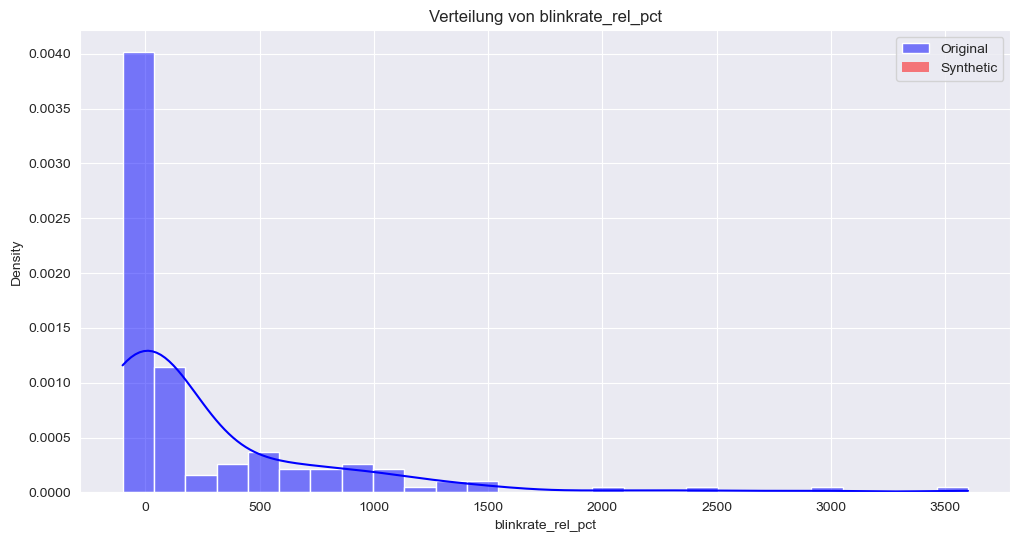

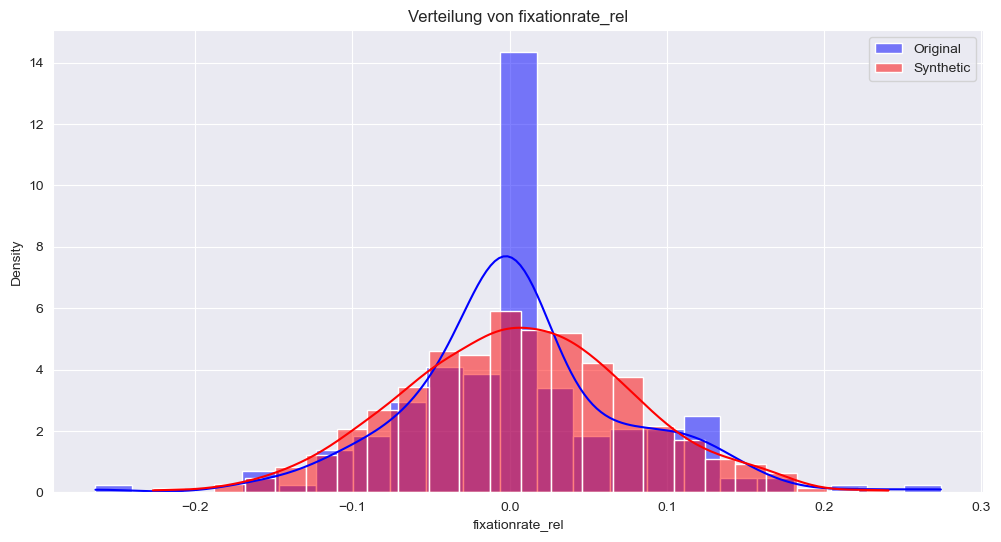

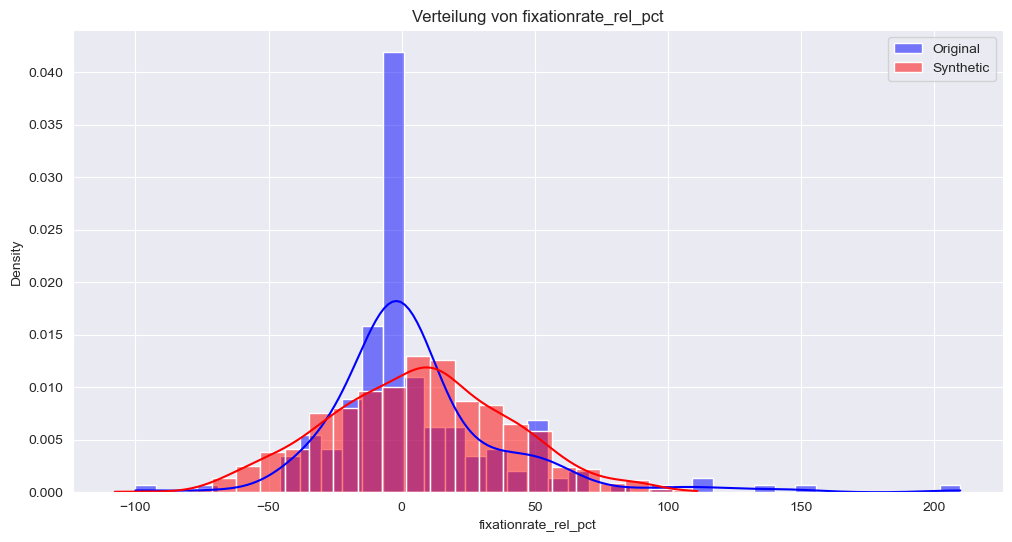

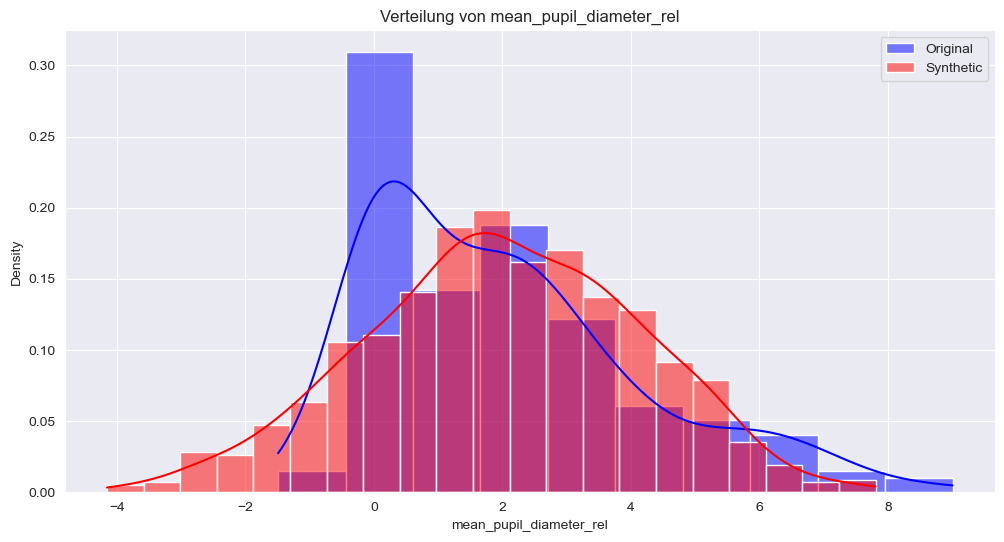

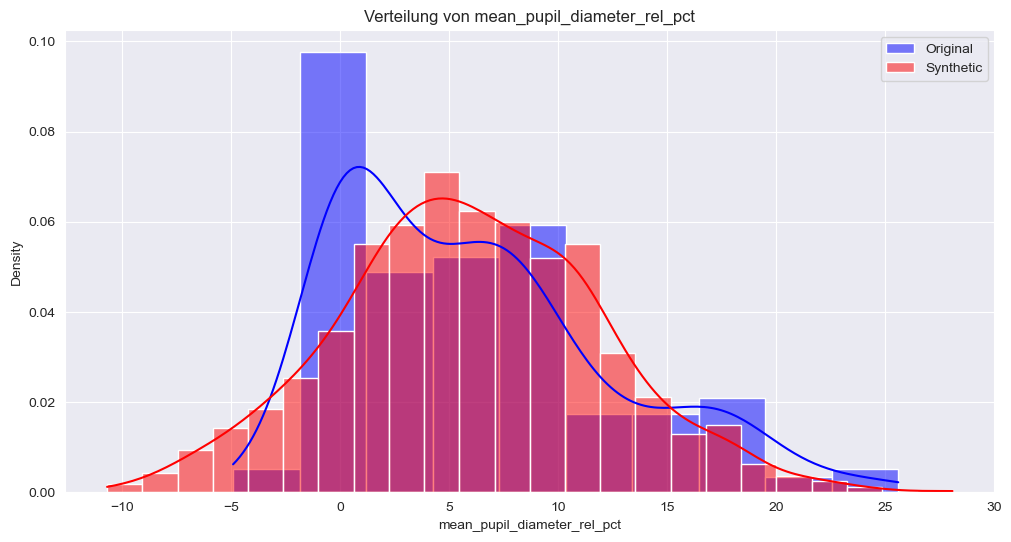

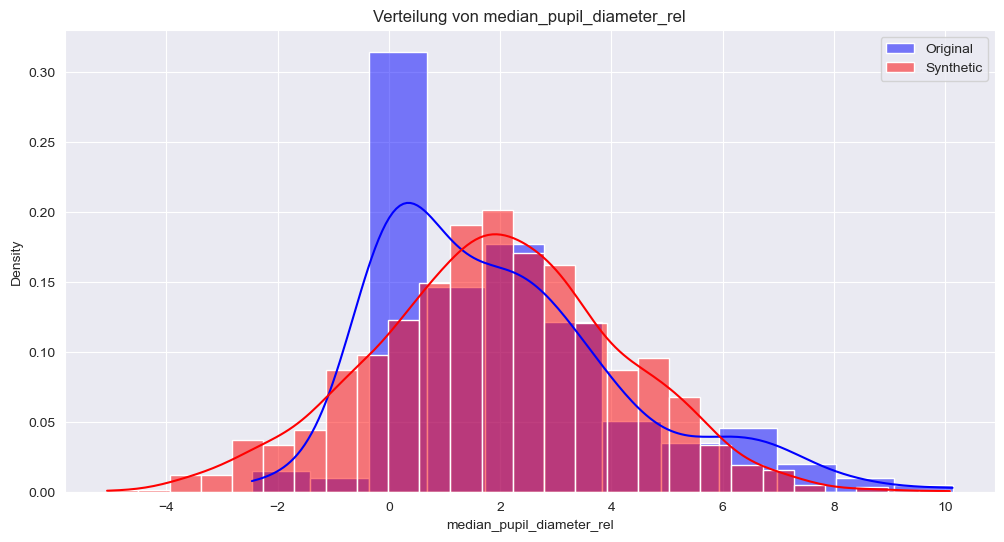

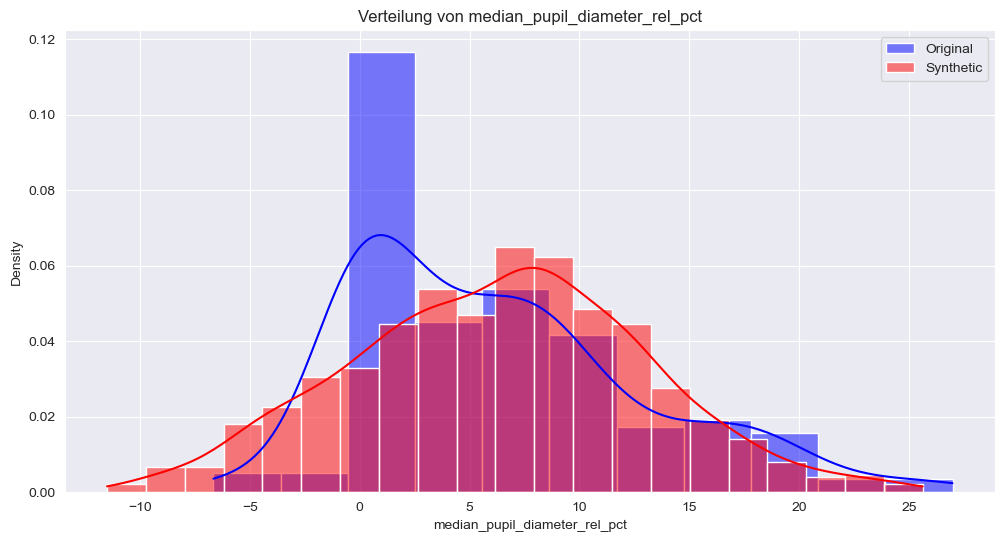

In [7]:
print("Synthetic Data saved successfully!")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konvertiere die augmented_data in ein DataFrame
augmented_data = pd.DataFrame(augmented_data, columns=data.columns)

# Getrennte DataFrames für Original- und generierte Daten
original_df = data.copy()
synthetic_df = augmented_data.iloc[len(data):].copy()

# Histogramme und Dichtekurven für jede Spalte
for column in data.columns:
    if column not in ['participant_id', 'test_id']:  # IDs auslassen
        plt.figure(figsize=(12, 6))
        sns.histplot(original_df[column], kde=True, color='blue', label='Original', stat='density')
        sns.histplot(synthetic_df[column], kde=True, color='red', label='Synthetic', stat='density')
        plt.title(f'Verteilung von {column}')
        plt.legend()
        plt.show()

In [8]:

import scipy.stats as stats
from scipy.stats import ttest_ind, kruskal

# Funktion zur Durchführung der Tests
def normality_test(data, column):
    stat, p_value = stats.shapiro(data[column])
    return p_value > 0.05  # Normal verteilt, wenn p-Wert > 0.05

def compare_means(original, synthetic, column):
    is_normal_original = normality_test(original, column)
    is_normal_synthetic = normality_test(synthetic, column)
    
    print(f'Normalitätstest für {column}:')
    print(f'Originaldaten: {"Normalverteilt" if is_normal_original else "Nicht-normalverteilt"}')
    print(f'Generierte Daten: {"Normalverteilt" if is_normal_synthetic else "Nicht-normalverteilt"}')
    
    if is_normal_original and is_normal_synthetic:
        # t-Test anwenden
        stat, p_value = ttest_ind(original[column], synthetic[column], equal_var=False)
        print(f't-Test für {column}:')
    else:
        # Kruskal-Wallis H-Test anwenden
        stat, p_value = kruskal(original[column], synthetic[column])
        print(f'Kruskal-Wallis H-Test für {column}:')
    
    print(f'Statistik = {stat}, p-Wert = {p_value}')
    if p_value > 0.05:
        print("Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).")
    else:
        print("Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).")
    print()



# Vergleiche die Verteilungen für jede Spalte
for column in data.columns:
    if column not in ['participant_id', 'test_id']:  # IDs auslassen
        compare_means(original_df, synthetic_df, column)

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 8.045375130819377, p-Wert = 0.004561997076067791
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.03325054596495527, p-Wert = 0.8553101633025422
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 3.610194785852467, p-Wert = 0.05742639319113317
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 0.20204966060711527, p-Wert = 0.6530714809220928
Die V